## 1. Listening Experiment: Intermediate analysis


In [8]:
import json
import os

def load_json(p):
    with open('sessions/' + p, "r") as f:
        return json.load(f)

_sessions = list(map(load_json, os.listdir('sessions')))
print(len(_sessions))

41


In [104]:
stuck = 0
sessions = []
for s in _sessions:
    if(s['metadata']['status'] == 'done' or s['metadata']['status'] == 'review'):
        sessions.append(s)
    elif(s['index'] > 1):
        judged = 0
        for x in s['pairings']:
            if not x['repeat'] and x['choice'] != 'none':
                judged += 1
        print('judged: ', judged)
        if judged == 1:
            print(s['metadata'])
        stuck += 1
print(len(sessions))
print(len(sessions)*24)
print(stuck)

judged:  2
judged:  11
judged:  2
judged:  1
{'id': '4406b658', 'source': 'friends', 'status': 'running'}
judged:  2
judged:  0
judged:  8
judged:  8
29
696
8


In [10]:
print(sessions[3].keys())
print(sessions[3]['pairings'][0].keys())

dict_keys(['metadata', 'index', 'pairings', 'general', 'review'])
dict_keys(['id', 'set1', 'set2', 'sample1', 'sample2', 'dQ', 'repeat', 'choice'])


In [11]:
exp = [0,0,0,0]
env = [0,0,0,0,0]
for s in sessions:
    exp[int(s['general']['experience']) - 1] += 1
    env[int(s['general']['environment']) - 1] += 1
    if int(s['general']['environment']) == 1:
        print(s['metadata'])
    

{'id': '68a3e0a4', 'source': 'friends', 'status': 'done'}


In [12]:
print("Experience counts:")
print(f"<1 year: {exp[0]}")
print(f"1-5 year: {exp[1]}")
print(f"5-10 year: {exp[2]}")
print(f">10: {exp[3]}")

print("Environment counts:")
print(f"non-dedicated: {env[0]}")
print(f"low-end: {env[1]}")
print(f"mid-range: {env[2]}")
print(f"high-end: {env[3]}")
print(f"professional: {env[4]}")

Experience counts:
<1 year: 6
1-5 year: 13
5-10 year: 8
>10: 2
Environment counts:
non-dedicated: 1
low-end: 5
mid-range: 21
high-end: 1
professional: 1


In [68]:
dQs = []

for s in sessions:
    for x in s['pairings']:
        dQs.append(abs(x['dQ']))

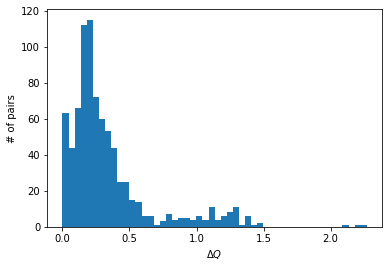

In [69]:
import matplotlib.pyplot as plt
import tikzplotlib

plt.rcParams['hist.bins'] = 50
plt.hist(dQs)
plt.ylabel('# of pairs')
plt.xlabel('$\Delta Q$')
tikzplotlib.save("dQ_distribution.tex", axis_width='3.2in', axis_height='2.4in')
plt.show()

In [61]:
for s in sessions:
    for x in s['pairings']:
        if(x['choice'] == 'none'):
            print(x['dQ'])

In [119]:
def moving_avg(sample, n):
    ir = np.ones(n)/n
    return np.convolve(sample, ir)

def agreement(l,h):
    total = 0
    agree = 0
    for s in _sessions:
        for x in s['pairings']:
            if l < abs(x['dQ']) < h and x['choice'] != 'none' and not x['repeat']:
                total += 1
                if x['dQ'] > 0 and x['choice'] == 2:
                    agree += 1
                elif x['dQ'] < 0 and x['choice'] == 1:
                    agree += 1
    if total == 0:
        return 0, 0
    else:
        return (agree/total)*100, total
    
def agreement_subset(exp=None,env=None):
    total = 0
    agree = 0
    for s in sessions:
        if (exp is None or int(s['general']['experience']) == exp) and (env is None or int(s['general']['environment']) == env):
            for x in s['pairings']:
                if x['choice'] != 'none' and not x['repeat']:
                    total += 1
                    if x['dQ'] > 0 and x['choice'] == 2:
                        agree += 1
                    elif x['dQ'] < 0 and x['choice'] == 1:
                        agree += 1
    if total == 0:
        return 0, 0
    else:
        return (agree/total)*100, total
    
def agreement_data():
    d = ['d1', 'd2', 'd3']
    total = 0
    agree = 0
    for s in sessions:
        for x in s['pairings']:
            if (x['set1'] in d or x['set2'] in d) and x['choice'] != 'none' and not x['repeat']:
                total += 1
                if x['dQ'] > 0 and x['choice'] == 2:
                    agree += 1
                elif x['dQ'] < 0 and x['choice'] == 1:
                    agree += 1
    if total == 0:
        return 0, 0
    else:
        return (agree/total)*100, total

def agreement_ai():
    m = ['m1', 'm2', 'm3']
    total = 0
    agree = 0
    for s in sessions:
        for x in s['pairings']:
            if (x['set1'] in m and x['set2'] in m) and x['choice'] != 'none' and not x['repeat']:
                total += 1
                if x['dQ'] > 0 and x['choice'] == 2:
                    agree += 1
                elif x['dQ'] < 0 and x['choice'] == 1:
                    agree += 1
    if total == 0:
        return 0, 0
    else:
        return (agree/total)*100, total
    
def agreement_correct_repeats():
    total = 0
    agree = 0
    def correct(s, x):
        for y in s['pairings']:
            if x['id'] == y['id'] and not y['repeat']:
                if x['dQ'] == y['dQ'] and x['choice'] == y['choice']:
                    return True
                elif x['dQ'] != y['dQ'] and x['choice'] != y['choice']:
                    return True
        return False
    for s in sessions:
        for x in s['pairings']:
            if x['repeat'] and correct(s,x):
                total += 1
                if x['dQ'] > 0 and x['choice'] == 2:
                    agree += 1
                elif x['dQ'] < 0 and x['choice'] == 1:
                    agree += 1
    if total == 0:
        return 0, 0
    else:
        return (agree/total)*100, total
                
    
print(agreement(0,3))
print(agreement(1,3))
print(agreement_data())
print(agreement_ai())
print(agreement_correct_repeats())

(60.68493150684932, 730)
(73.33333333333333, 60)
(55.45977011494253, 348)
(65.80459770114942, 348)
(62.365591397849464, 93)


In [19]:
halves = []
for i in range(0,1000):
    ran = np.random.rand(624)
    halfs = 0
    for x in ran:
        if x > 0.5:
            halfs += 1
    halves.append(halfs / 624)
print(np.max(halves))

NameError: name 'np' is not defined

In [38]:
import numpy as np

agr = []
tot = []

for x in np.arange(0,1.6,0.01):
    l = x - 0.1
    h = x + 0.1
    a, t = agreement(l,h)
    agr.append(a)
    tot.append(t/3)

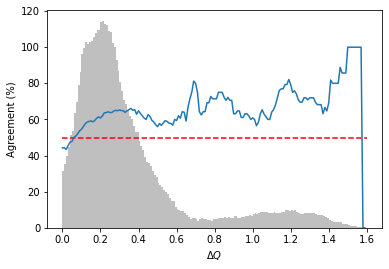

In [39]:
# plt.bar(np.arange(0,1.6,0.01), agr, align='edge', width=0.01)
plt.plot(np.arange(0,1.6,0.01), agr)
plt.bar(np.arange(0,1.6,0.01), tot, align='edge', width=0.01, color=['grey'], alpha=0.5)
# plt.plot(np.arange(0,1.6,0.01), moving_avg(agr,11)[5:165], 'g')
plt.hlines(50, 0, 1.6, linestyles='dashed', color=['red'])
plt.ylabel('Agreement (%)')
plt.xlabel('$\Delta Q$')
plt.show()

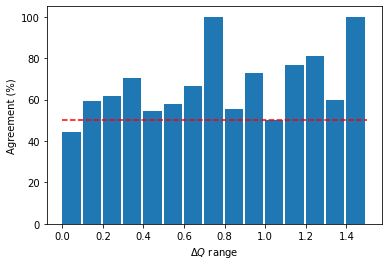

In [82]:
import tikzplotlib

ag2 = []

for x in np.arange(0,1.5,0.1):
    l = x
    h = x + 0.1
    a, _ = agreement(l,h)
    ag2.append(a)
    
plt.bar(np.arange(0,1.5,0.1), ag2, align='edge', width=0.09)
plt.hlines(50, 0, 1.5, linestyles='dashed', color=['red'])
plt.ylabel('Agreement (%)')
plt.xlabel('$\Delta Q$ range')
# tikzplotlib.clean_figure()
# tikzplotlib.save("dQ_bars.tex", axis_width='3.2in', axis_height='2.4in')
plt.show()

In [22]:
with open('C://xampp/htdocs/kicks/test.json') as f:
    test = json.load(f)

In [23]:
dQs = []
for s in test:
    for x in s:
        dQs.append(abs(x['dQ']))

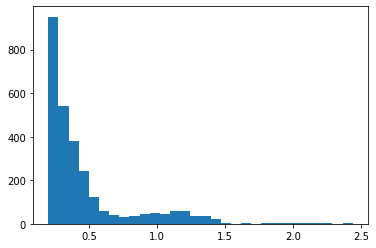

In [24]:
plt.hist(dQs)
plt.show()

In [33]:
len(test)

100

In [34]:
import json

with open("quals.json", "r") as f:
    quals = json.load(f)

In [35]:
d1 = quals["d1"] 
d2 = quals["d2"]
d3 = quals["d3"]
m1 = quals["m1"]
m2 = quals["m2"]
m3 = quals["m3"]

In [36]:
import numpy as np

In [52]:
print(np.mean(d3))
print(np.max(d3))
print(np.min(d3))
print(d3)

0.6904362800260168
1.07344682702133
0.45407215906586873
[0.5867632219675443, 0.6278479727042271, 0.6119326627582143, 0.9800444902225323, 0.5849180637984766, 0.649986360784373, 0.5124865719752824, 0.5751371867088924, 0.739099619011646, 0.5388469920603889, 0.5741747811902453, 0.6135738710047247, 0.8301379000694633, 0.7705109499149475, 0.5433363281953784, 0.5676485894631458, 0.7537347083444692, 0.7904763322824551, 0.7041652864505805, 0.5883325258893856, 0.5745065095495967, 0.8328961880273127, 0.6851110012541088, 0.6977580037490807, 0.8866527665383204, 0.6678511467848325, 0.6931496215351446, 0.7033498320009175, 0.9869510807940608, 0.7618345409528924, 0.6831321160788456, 0.7019401531453806, 0.9595893984858456, 0.5723569033273392, 1.07344682702133, 0.8354930587615864, 0.7472559141266832, 0.7391175516864141, 0.7561902658353241, 0.5721807674158312, 0.619731284088641, 0.45407215906586873, 0.4983078953966426, 0.5660738920054076, 0.6575293087469732]


In [112]:
sets = {
    'd1': 0,
    'd2': 1,
    'd3': 2,
    'm1': 3,
    'm2': 4,
    'm3': 5
}

wins = np.zeros((6,6))
totals = np.zeros((6,6))

for s in _sessions:
    for x in s['pairings']:
        if x['choice'] != 'none' and not x['repeat']:
            totals[sets[x['set1']]][sets[x['set2']]] += 1
            totals[sets[x['set2']]][sets[x['set1']]] += 1
            if x['choice'] == 1:
                wins[sets[x['set1']]][sets[x['set2']]] += 1
            elif x['choice'] == 2:
                wins[sets[x['set2']]][sets[x['set1']]] += 1
                
for i in range(0,6):
    for j in range(0,6):
        if totals[i][j] != 0:
            wins[i][j] = (wins[i][j] / totals[i][j]) * 100
        if i == j:
            wins[i][j] = 0
            
# print("by,against\td1\td2\td3\tm1\tm2\tm3")
# for i in range(0,6):
#     ln = f"{list(sets.keys())[i]}\t\t"
#     for j in range(0,6):
#         if wins[i][j] != 0:
#             ln += f"{round(wins[i][j],2)}\t"
#         else:
#             ln += "-\t"
#     print(ln)

print("by,against\td1\td2\td3\tm1\tm2\tm3")
for i in range(0,6):
    ln = f"{list(sets.keys())[i]} & "
    for j in range(0,6):
        if wins[i][j] != 0:
            ln += f"{round(wins[i][j],2)} & "
        else:
            ln += "- & "
    ln += ' \\\\'
    print(ln)

by,against	d1	d2	d3	m1	m2	m3
d1 & - & 56.67 & 77.05 & 84.38 & 67.74 & 86.67 &  \\
d2 & 43.33 & - & 74.19 & - & - & - &  \\
d3 & 22.95 & 25.81 & - & - & - & - &  \\
m1 & 15.62 & - & - & - & 31.45 & 74.79 &  \\
m2 & 32.26 & - & - & 68.55 & - & 77.5 &  \\
m3 & 13.33 & - & - & 25.21 & 22.5 & - &  \\


In [89]:
sets = {
    'd1': 0,
    'd2': 1,
    'd3': 2,
    'm1': 3,
    'm2': 4,
    'm3': 5
}

wins = np.zeros((6,6))
totals = np.zeros((6,6))

for s in _sessions:
    for x in s['pairings']:
        if x['choice'] != 'none' and not x['repeat']:
            totals[sets[x['set1']]][sets[x['set2']]] += 1
            totals[sets[x['set2']]][sets[x['set1']]] += 1
            if x['choice'] == 1:
                wins[sets[x['set1']]][sets[x['set2']]] += 1
            elif x['choice'] == 2:
                wins[sets[x['set2']]][sets[x['set1']]] += 1
                
for i in range(0,6):
    for j in range(0,6):
        if totals[i][j] != 0:
            wins[i][j] = (wins[i][j] / totals[i][j]) * 100
        if i == j:
            wins[i][j] = 0
            
print("by,against\td1\td2\td3\tm1\tm2\tm3")
for i in range(0,6):
    ln = f"{list(sets.keys())[i]}\t\t"
    for j in range(0,6):
        if wins[i][j] != 0:
            ln += f"{round(wins[i][j],2)}\t"
        else:
            ln += "-\t"
    print(ln)

by,against	d1	d2	d3	m1	m2	m3
d1		-	56.67	77.05	84.38	67.74	86.67	
d2		43.33	-	74.19	-	-	-	
d3		22.95	25.81	-	-	-	-	
m1		15.62	-	-	-	31.45	74.79	
m2		32.26	-	-	68.55	-	77.5	
m3		13.33	-	-	25.21	22.5	-	


In [291]:
for s in sessions:
    if 'review' in s.keys():
        print(s['metadata']['source'] + s['metadata']['id'])
        print(s['review']['focus'] + '\n')

billegal40a487a8
Transient of the kick and aliasing artifacts in the tail end.

billegal9a73271d
Overall timbre/punchiness of the kick drum, amount of low/high end

billegald54b1178
I had Vengeance-style kicks in mind, and a lot of the kicks i would guess to be generated had either some weird comb-filter-type sound to them or some super unconventional tails

friends06f2270e


friends68a3e0a4


friendsb65c76d0
Some samples were really distorted a lot, which often make me pick the other option. Other samples had a bit too much high-end clicking noise. Some samples also ended too abruptly.

friendsb8848fef
I listen mostly to deep house and techno (not the harder variant), so I have a proference for more subtle kicks

happymouse87ed55f4
lots of clicking noises are a nono

happymousea05cfac6
Sample quality - specifically strange noises in the attack of the sample.

mussar4835aca7
1. I was listening for the volume and length of the transient, particularly to see if it felt too long or in som

In [293]:
for s in sessions:
    if 'review' in s.keys():
        for x in s['pairings']:
            if x['repeat']:
                total = 0
                same = 0
                for y in s['pairings']:
                    if x['id'] == y['id']:
                        total += 1
                        if x['dQ'] == y['dQ'] and x['choice'] == y['choice']:
                            same += 1
                        elif x['dQ'] != y['dQ'] and x['choice'] != y['choice']:
                            same += 1
                acc = (same/total)*100
        print(s['metadata']['source'] + s['metadata']['id'], acc)
        print(s['review']['repeats'] + '\n')

billegal40a487a8 100.0


billegal9a73271d 100.0
I didn't recognize this happening. 

billegald54b1178 100.0
I noticed a lot of kick drums being used multiple times, but I did not notice the same match-ups appearing

friends06f2270e 100.0


friends68a3e0a4 100.0
I did notice! I don't think second occurrances guided me in making the new choice though.

friendsb65c76d0 100.0
I did recognize that I heard some samples multiple times, but I did not notice that they were the exact same pairs.

friendsb8848fef 100.0
I did notice a few pairs were repeated.

happymouse87ed55f4 50.0
maybe 2 or 3

happymousea05cfac6 100.0
There were quite a few close calls, but mostly on pairs where I wasn't particularly fond of either option presented.

mussar4835aca7 100.0
yeah it was pretty obvious when i was given the same sounds. 

mussar6a193a76 100.0
Yes, noticed the repetition. There were also some pairs where both were good kicks, or both were interesting samples, or one was more of a kick and the other c